In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
from scipy.optimize import curve_fit
from lab_lib import *


In [18]:
def make_plot_with_2mnk(file, title, xlabel, ylabel, x, y, dx, dy, k_b1, k_b2):

    mpl.rcParams['font.size'] = 16                   # Управление стилем, в данном случаем - размером шрифта
    plt.figure(figsize = (10,8), facecolor = "white") # Создаем фигуру

    # Подписываем оси и график
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

    #plt.errorbar(x, y, "or", markersize = 9, label = 'Экспериментальные значения')
    plt.errorbar(x, y, xerr = dx, yerr = dy, fmt='.r', label = 'Экспериментальные значения')
    #plt.plot(x, y, "+b", label = "Экспериментальные данные", linewidth = 1)

    x_lin = np.linspace(min(x), max(x), 1000)
    y_lin = np.linspace(min(y), max(y), 1000)
    plt.plot(x_lin, [i * k_b2[0][0] + k_b2[1][0] for i in x_lin], "b", label = r"Касательная макс $\mu_{диф_{нач}}$")
    plt.plot([(i - k_b1[1][0]) / k_b1[0][0] for i in y_lin], y_lin, "g", label = r"Касательная $\mu_{диф_{макс}}$")

    plt.grid(visible = True, which = 'major', axis = 'both', alpha = 1, linewidth = 0.9)   # Активируем сетку
    plt.grid(visible = True, which = 'minor', axis = 'both', alpha = 0.5, linestyle = ':')

    plt.minorticks_on()
    plt.tight_layout()
    plt.legend(loc = "best", fontsize = 12) # Активируем легенду графика

    plt.savefig("{}".format(file))
    plt.show()


k: (0.5700648414782069 +- 0.006239376094580911)
b: (-1.099903938341555 +- 0.06305029409884949)
k: (0.16888786758454916 +- 0.014493113989545532)
b: (6.368627454482716 +- 0.5076686758540948)


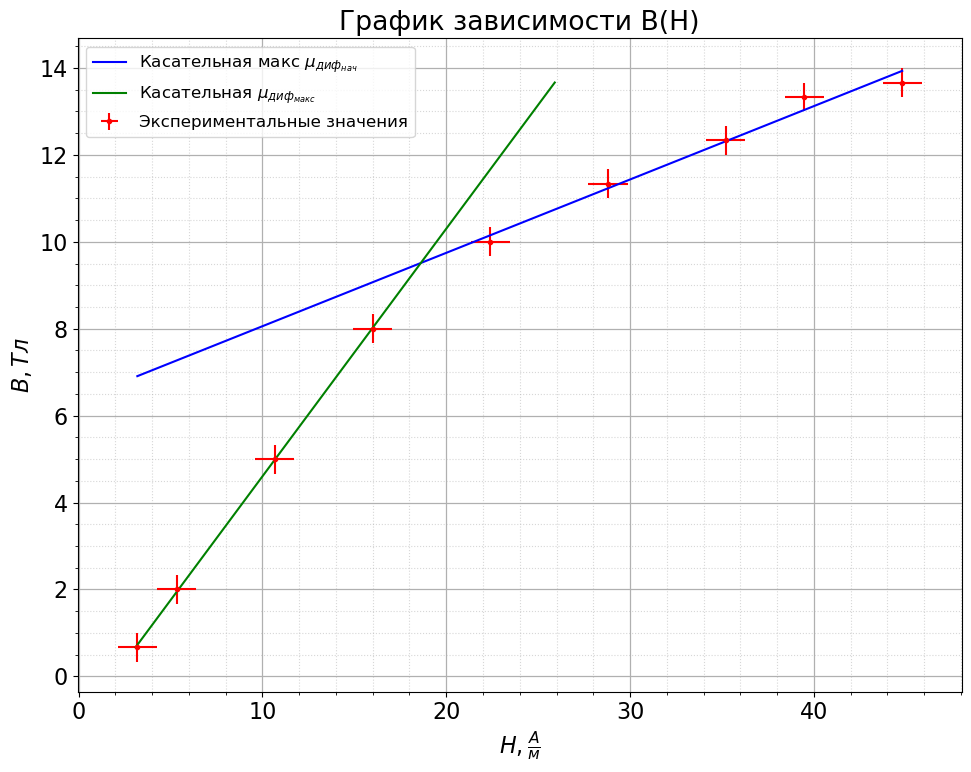

In [25]:
from ctypes import c_ubyte


def Fe():
    raw_data = [[[i[0], 0.2], [i[1], 0.2], [i[2], 0.01]] for i in pd.read_csv("data/Ferrit.csv").to_numpy()]

    K_x = 0.02
    K_y = 0.01

    N_0 = 40
    twoPiR = 0.25
    R_0 = 0.3
    H_k = K_x * N_0 / (twoPiR * R_0)

    R_u = 20 * 10**3
    C_u = 20 * 10**-6
    S = 3 * 10**-4
    N_u = 400

    B_k = R_u * C_u / (S * N_u)

    data = []
    for i in raw_data:
        H = countWithSigma(H_k * i[0][0] / 2, [i[0]])
        B = countWithSigma(B_k * i[1][0] / 2, [i[1]])
        data.append([H, B, i[2]])

    H_max = data[0][0]
    B_s   = data[0][1]

    raw_c = [[1.2, 0.2], [3.2, 0.2]]
    H_c = countWithSigma(H_k * raw_c[0][0] / 2, [raw_c[0]])
    B_r = countWithSigma(B_k * raw_c[1][0] / 2, [raw_c[1]])

    k_b_beg = mnk([i[0][0] for i in data[-4:]], [i[1][0] for i in data[-4:]])
    k_b_max = mnk([i[0][0] for i in data[:5]],  [i[1][0] for i in data[:5]])

    make_plot_with_2mnk("img/plot_Fe.png", r"График зависимости B(H)", r"$H, \frac{А}{м}$", r"$B, Тл$",
                        [i[0][0] for i in data], [i[1][0] for i in data],
                        [i[0][1] for i in data], [i[1][1] for i in data],
                        k_b_beg, k_b_max)

    mu_diff_beg = k_b_beg[0]
    mu_diff_max = k_b_max[0]

Fe()


